In [1]:
import pandas as pd
import numpy as np
import pickle

pd.options.display.max_columns = 100
pd.options.display.max_rows = 1500

df = pd.read_excel('C:/Users/Anastasiya.Mittseva/PycharmProjects/ProjectPredictSolidity/prepared_data.xlsx')

df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,%А остаточный,HV,HRC
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,0.11,NaN,NaN,NaN,NaN,NaN,180.0,NaN
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,0.31,NaN,NaN,NaN,NaN,NaN,180.0,NaN
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,1.00,NaN,NaN,NaN,NaN,NaN,180.0,NaN
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,3.40,NaN,NaN,NaN,NaN,NaN,195.0,NaN
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,7.00,NaN,NaN,NaN,NaN,NaN,200.0,NaN


## Подготовка данных

In [2]:
def convertHRCtoHV(x):
    y = 0.0001076546813696400 * x ** 4 - 0.01404920211793480 * x ** 3 + 0.7989548243359580 * x ** 2 - 13.82475417563670 * x + 289.8692821768870
    return y

def repl(x):
    if np.isnan(x):
        return round(convertHRCtoHV(df['HRC'].loc[x.index]),2)
    else:
        return x

In [3]:
df['HRC'] = df['HRC'].map(convertHRCtoHV)

df['HV'] = df['HV'].combine_first(df['HRC'])

df = df.drop('HRC',1)

df = df.fillna(0)

df = df[~(df['HV'] == 0.0)]

df = df.drop(df[df['%А остаточный'] != 0].index)

df = df.drop('%А остаточный',1)

df = df[~(df['V800-500 °C/c']== 0.0)]

df = df.drop(df[(df['%Ф']+df['%П']+df['%Б']+df['%М']) != 100].index)

df = df.reset_index()

df = df.drop('index',1)

df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,HV
0,X65NbV,0.11,1.02,0.28,0.0015,0.009,0.13,0.01,0.18,0.09,0.071,0.018,0.0,0.026,0.0,0.0,0.354467,920,10,875.66189,0.0,0.0,1.0,84.0,16.0,0.0,0.0,161.0
1,X65NbV,0.11,1.02,0.28,0.0015,0.009,0.13,0.01,0.18,0.09,0.071,0.018,0.0,0.026,0.0,0.0,0.354467,920,10,875.66189,0.0,0.0,5.0,82.0,12.0,0.0,6.0,175.0
2,X65NbV,0.11,1.02,0.28,0.0015,0.009,0.13,0.01,0.18,0.09,0.071,0.018,0.0,0.026,0.0,0.0,0.354467,920,10,875.66189,0.0,0.0,10.0,79.0,8.0,5.0,8.0,188.0
3,X65NbV,0.11,1.02,0.28,0.0015,0.009,0.13,0.01,0.18,0.09,0.071,0.018,0.0,0.026,0.0,0.0,0.354467,920,10,875.66189,0.0,0.0,20.0,69.0,0.0,21.0,10.0,200.0
4,X65NbV,0.11,1.02,0.28,0.0015,0.009,0.13,0.01,0.18,0.09,0.071,0.018,0.0,0.026,0.0,0.0,0.354467,920,10,875.66189,0.0,0.0,40.0,51.0,0.0,36.0,13.0,225.0


## Графики

In [4]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

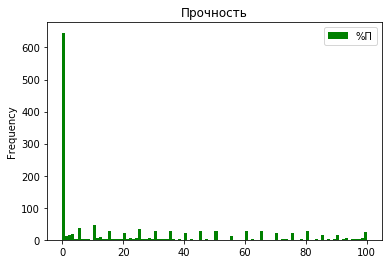

In [5]:
df.plot(y='%П', kind='hist', color='green', title='Прочность', bins=100)
plt.show()

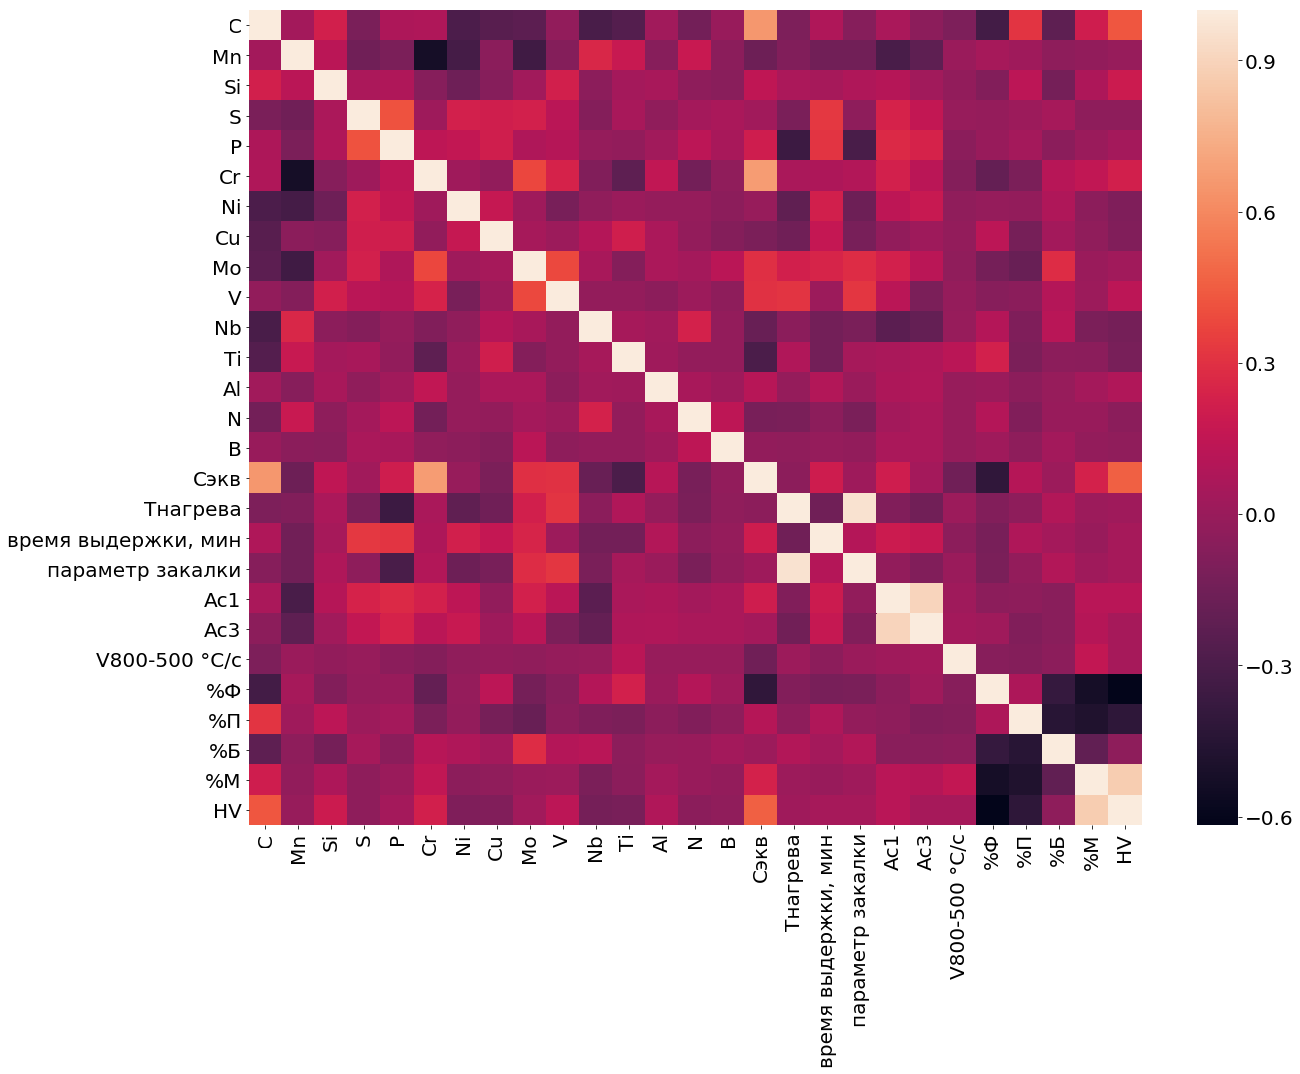

In [11]:
plt.rcParams.update({'font.size': 20})
plt.subplots(figsize=(20,15))

corr = df.corr()
corr_hm = sns.heatmap(corr)
fig = corr_hm.get_figure()

In [6]:
df_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti',
       'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
ls_targets = ['%П','%М','%Б','%Ф']

In [13]:
df[df_col].corrwith(df['%П'])

С                   0.315536
Mn                  0.022558
Si                  0.131899
S                   0.010834
P                   0.045666
Cr                 -0.107165
Ni                 -0.021371
Cu                 -0.129073
Mo                 -0.184448
V                  -0.053622
Nb                 -0.096770
Ti                 -0.106937
Al                 -0.048673
N                  -0.091399
B                  -0.038658
Сэкв                0.106287
параметр закалки   -0.018370
V800-500 °C/c      -0.077103
dtype: float64

## KFold 

In [28]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['%Ф','%П','%Б','%М']

x_input = df[ls_train_col]
y_input = df[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

rfr = RandomForestRegressor(max_features = 12, max_depth = 15, min_samples_leaf = 1, n_estimators=200, criterion='mse')

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = []
    for i in range(y.columns.size):
        corr.append(np.corrcoef(y.iloc[:, i].T, 
                                y_pred[:, i]))

#     corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    
    print('Correlation %Ф: ', round(corr[0][0][1], 2))
    print('Correlation %П: ', round(corr[1][0][1], 2))
    print('Correlation %Б: ', round(corr[2][0][1], 2))
    print('Correlation %М: ', round(corr[3][0][1], 2))

#     print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [30]:
param_grid = {
    'max_depth': range(6, 18, 2),
    'max_features': range(6, 18, 2),
    'min_samples_leaf': range(1, 5),
    'n_estimators': range(50, 300, 50)
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='neg_mean_absolute_error')

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  3.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(6, 18, 2), 'max_features': range(6, 18, 2), 'min_samples_leaf': range(1, 5), 'n_estimators': range(50, 300, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [31]:
grid_search.best_params_

{'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [27]:
test_scr, test_r2, test_mae, test_mse = print_and_return_score(x_test, y_test, grid_search)

Score:  -9.98
R^2:  0.73
MAE:  9.98
MSE:  263.95
Correlation %Ф:  0.87
Correlation %П:  0.84
Correlation %Б:  0.84
Correlation %М:  0.89


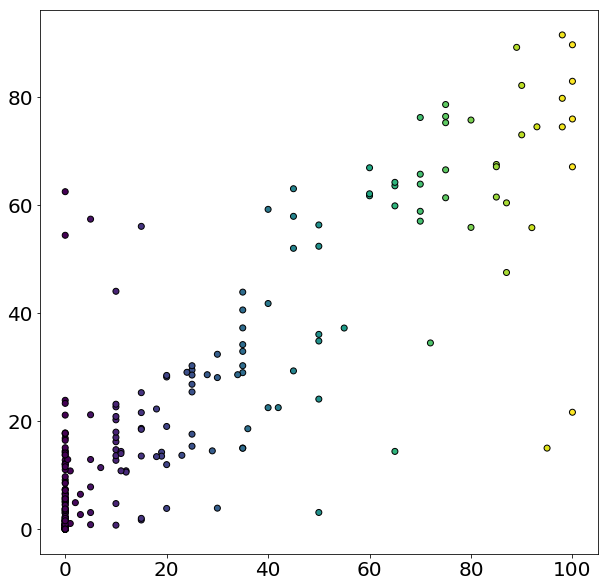

In [21]:
y_predict_test = grid_search.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
# plt.colorbar()
plt.show()

In [45]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr = grid_search.best_estimator_
    rfr.fit(x_train, y_train)

    scores.append(print_and_return_score(x_test, y_test, rfr))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [35]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.83
0.83
7.85
150.5
0.91


In [20]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr.fit(x_train, y_train)
    
    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.81
R^2:  0.81
MAE:  8.06
MSE:  156.61
Correlation  0.9


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.86
R^2:  0.86
MAE:  7.17
MSE:  122.39
Correlation  0.93


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.87
R^2:  0.87
MAE:  6.82
MSE:  113.72
Correlation  0.93


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.78
R^2:  0.78
MAE:  8.54
MSE:  182.17
Correlation  0.89


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.86
R^2:  0.86
MAE:  6.69
MSE:  134.41
Correlation  0.94


In [21]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.84
0.84
7.45
141.86
0.92


In [22]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.78
R^2:  0.78
MAE:  8.5
MSE:  187.51
Correlation  0.89


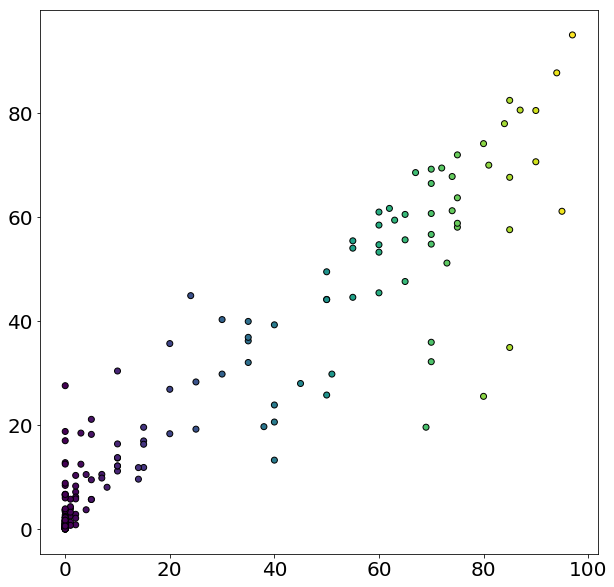

In [23]:
y_predict = rfr.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

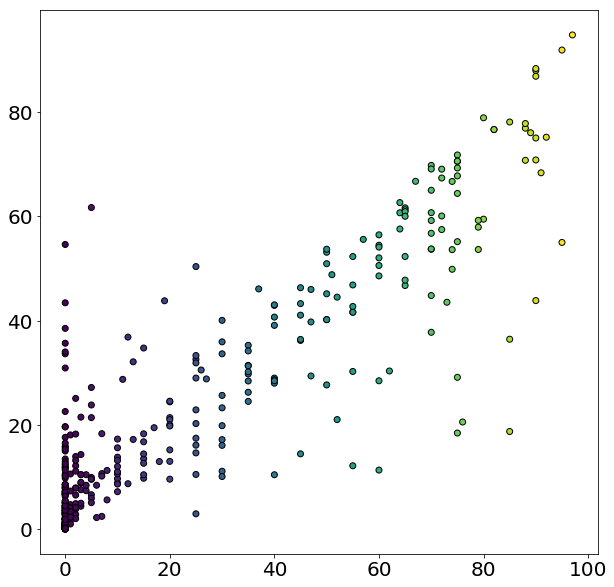

In [24]:
y_predict = rfr.predict(x_valid)

plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

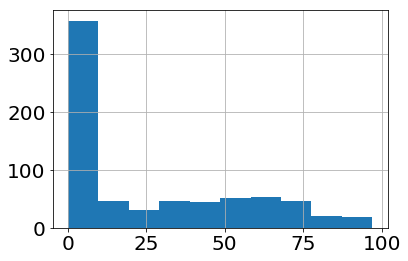

In [26]:
y_train['%Ф'].hist()

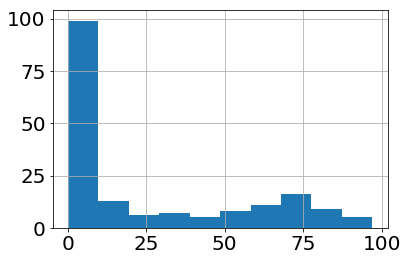

In [27]:
y_test['%Ф'].hist()

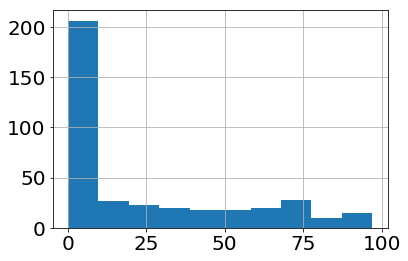

In [28]:
y_valid['%Ф'].hist()